In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
eng_deep = {
    'Manchester': ['Longsight', 'Rochdale', 'Oldham', 'Heald Green', 'Cheetham Hill', 'Rusholme', 'Crumpsall'],
    'Birmingham': [ 'Sparkhill',"Alum Rock", "Small Heath", "Sparkbrook", "NAN", "NAN","NAN"],
    "Leeds" : ["North Yorkshire", "Spa town","NAN","NAN","NAN","NAN","NAN"],
    "Bradford" : [ "Manningham", "Toller", "Moor", "Little Horton" ,"Keighlley","NAN","NAN"],
}

In [6]:
eng_deep = pd.DataFrame(eng_deep)

In [64]:
eng_deep

,Manchester,Birmingham,Leeds,Bradford,Population(Birmingham),Population(Leeds),Population(Bradford),Population(Manchester)
0,Longsight,Sparkhill,North Yorkshire,Manningham,54586,13429,68436,25028
1,Rochdale,Alum Rock,Spa town,Toller,46384,9010,15050,13615
2,Oldham,Small Heath,NAN,Moor,58887,Nan,24485,12112
3,Heald Green,Sparkbrook,NAN,Little Horton,37896,Nan,25906,5749
4,Cheetham Hill,NAN,NAN,Keighlley,Nan,Nan,5692,10383
5,Rusholme,NAN,NAN,NAN,Nan,Nan,Nan,10043
6,Crumpsall,NAN,NAN,NAN,Nan,Nan,Nan,8509


In [63]:
eng_deep.iloc[:5, 7].sum()

66887

In [8]:
#birmingham : 195012 , Bradford : 139553, Manchester : 65875, Leeds: 22492

In [62]:
eng_deep["Population(Birmingham)"] = [54586, 46384, 58887, 37896, "Nan", "Nan", "Nan"]
eng_deep["Population(Leeds)"] = [13429, 9010, "Nan","Nan","Nan","Nan","Nan"]
eng_deep["Population(Bradford)"] = [68436, 15050, 24485, 25906, 5692, "Nan", "Nan"]
eng_deep["Population(Manchester)"] = [25028, 13615, 12112, 5749, 10383, 10043, 8509]

In [41]:
import random

def generate_random_numbers(limit):
    random_numbers = []
    for _ in range(7):
        random_numbers.append(random.randint(1, limit))
    return random_numbers

limit_number = 65875  # Replace with your desired limit number
random_numbers = generate_random_numbers(limit_number)
print(random_numbers)

[50228, 56155, 61142, 27449, 53833, 50443, 8509]


In [68]:
import openpyxl
eng_deep.to_excel('EnglandTownsExcel.xlsx', index = False)

In [8]:
data = {
    'Manchester': ['Longsight', 'Rochdale', 'Oldham', 'Heald Green', 'Cheetham Hill', 'Rusholme', 'Crumpsall'],
    'Birmingham': [ 'Sparkhill',"Alum Rock", "Small Heath", "Sparkbrook", "NAN", "NAN","NAN"],
    "Leeds" : ["North Yorkshire", "Spa town","NAN","NAN","NAN","NAN","NAN"],
    "Bradford" : [ "Manningham", "Toller", "Moor", "Little Horton" ,"Keighlley","NAN","NAN"],
    'Latitude': [53.4529, 53.6144, 53.5409, 53.3726, 53.5059, 53.4520, 53.5233],
    'Longitude': [-2.1981, -2.1610, -2.1114, -2.2147, -2.2426, -2.2170, -2.2439]
}

In [9]:
eng_df = pd.DataFrame(data)

In [10]:
eng_dfgeo = gpd.GeoDataFrame(eng_df, geometry = gpd.points_from_xy(eng_df.Longitude, eng_df.Latitude))

In [11]:
eng_dfgeo

,Manchester,Birmingham,Leeds,Bradford,Latitude,Longitude,geometry
0,Longsight,Sparkhill,North Yorkshire,Manningham,53.4529,-2.1981,POINT (-2.19810 53.45290)
1,Rochdale,Alum Rock,Spa town,Toller,53.6144,-2.1610,POINT (-2.16100 53.61440)
2,Oldham,Small Heath,NAN,Moor,53.5409,-2.1114,POINT (-2.11140 53.54090)
3,Heald Green,Sparkbrook,NAN,Little Horton,53.3726,-2.2147,POINT (-2.21470 53.37260)
4,Cheetham Hill,NAN,NAN,Keighlley,53.5059,-2.2426,POINT (-2.24260 53.50590)
5,Rusholme,NAN,NAN,NAN,53.4520,-2.2170,POINT (-2.21700 53.45200)
6,Crumpsall,NAN,NAN,NAN,53.5233,-2.2439,POINT (-2.24390 53.52330)


In [24]:
shx = r"D:\maps_uk\GBR_adm0.shx"

In [25]:
eng_shx = gpd.read_file(shx)

<Axes: >

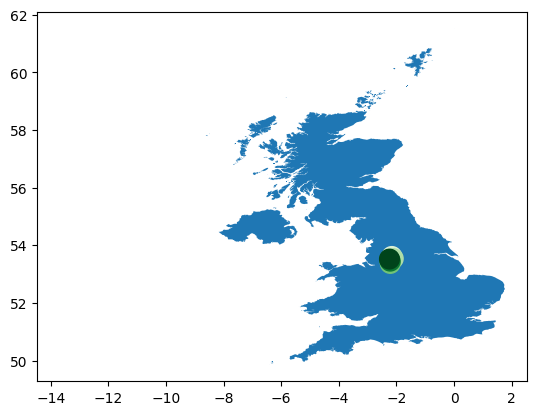

In [32]:
axis = eng_shx.plot()
eng_dfgeo.plot(ax = axis, markersize = 200, cmap = "Greens")

In [24]:
eng_g = r"C:\Users\hp\Documents\EnglandTownscsv.csv"

In [25]:
df = pd.read_csv(eng_g)

In [26]:
df = df.fillna("--")

In [27]:
df_centered = df.apply(lambda x: x.astype(str).str.center(15))

In [28]:
df_centered

,Manchester (Towns),Population(Manchester),Birmingham (Towns),Population(Birmingham),Leeds (Towns),Population(Leeds),Bradford (Towns),Population(Bradford)
0,Longsight,25028,Sparkhill,54586.0,North Yorkshire,13429.0,Manningham,68436.0
1,Rochdale,13615,Alum Rock,46384.0,Spa town,9010.0,Toller,15050.0
2,Oldham,12112,Small Heath,58887.0,--,--,Moor,24485.0
3,Heald Green,5749,Sparkbrook,37896.0,--,--,Little Horton,25906.0
4,Cheetham Hill,10383,--,--,--,--,Keighlley,5692.0
5,Rusholme,10043,--,--,--,--,--,--
6,Crumpsall,8509,--,--,--,--,--,--


In [29]:
df_centered

,Manchester (Towns),Population(Manchester),Birmingham (Towns),Population(Birmingham),Leeds (Towns),Population(Leeds),Bradford (Towns),Population(Bradford)
0,Longsight,25028,Sparkhill,54586.0,North Yorkshire,13429.0,Manningham,68436.0
1,Rochdale,13615,Alum Rock,46384.0,Spa town,9010.0,Toller,15050.0
2,Oldham,12112,Small Heath,58887.0,--,--,Moor,24485.0
3,Heald Green,5749,Sparkbrook,37896.0,--,--,Little Horton,25906.0
4,Cheetham Hill,10383,--,--,--,--,Keighlley,5692.0
5,Rusholme,10043,--,--,--,--,--,--
6,Crumpsall,8509,--,--,--,--,--,--


In [41]:
df

,Manchester (Towns),Population(Manchester),Birmingham (Towns),Population(Birmingham),Leeds (Towns),Population(Leeds),Bradford (Towns),Population(Bradford)
0,Longsight,25028,Sparkhill,54586.0,North Yorkshire,13429.0,Manningham,68436.0
1,Rochdale,13615,Alum Rock,46384.0,Spa town,9010.0,Toller,15050.0
2,Oldham,12112,Small Heath,58887.0,--,--,Moor,24485.0
3,Heald Green,5749,Sparkbrook,37896.0,--,--,Little Horton,25906.0
4,Cheetham Hill,10383,--,--,--,--,Keighlley,5692.0
5,Rusholme,10043,--,--,--,--,--,--
6,Crumpsall,8509,--,--,--,--,--,--


In [37]:
df_centered.iloc[:, 1]

0         25028     
1         13615     
2         12112     
3          5749     
4         10383     
5         10043     
6          8509     
Name: Population(Manchester), dtype: object

In [43]:
df.iloc[:, 1]

0    25028
1    13615
2    12112
3     5749
4    10383
5    10043
6     8509
Name: Population(Manchester), dtype: int64

In [47]:
addr = r"D:\maps_uk\EnglandTownscsv.csv"

In [67]:
engdf = pd.read_csv(addr)
engdf = engdf[:6]
engdf = engdf.fillna("--")
engdf

,Manchester (Towns),Population(Manchester),Latitude,Longitude,Birmingham (Towns),Population(Birmingham),Latitude.1,Longitude.1,Leeds (Towns),Population(Leeds),Latitude.2,Longitude.2,Bradford (Towns),Population(Bradford),Latitude.3,Longitude.3
0,Longsight,25028.0,53.4554,-2.1945,Sparkhill,54586.0,52.4497,-1.8646,North Yorkshire,13429,53.8008,-1.5491,Manningham,68436.0,53.8057,-1.7544
1,Rochdale,13615.0,53.6141,-2.1619,Alum Rock,46384.0,52.4946,-1.8459,Spa town,9010,53.905682,-1.356251,Toller,15050.0,53.7961,-1.7689
2,Oldham,12112.0,53.5409,-2.1114,Small Heath,58887.0,52.467,-1.8606,--,--,--,--,Moor,24485.0,53.8002,-1.8205
3,Heald Green,5749.0,53.3721,-2.2247,Sparkbrook,37896.0,52.463,-1.877,--,--,--,--,Little Horton,25906.0,53.7819,-1.7641
4,Cheetham Hill,10383.0,53.5086,-2.2430,--,--,--,--,--,--,--,--,Keighlley,5692.0,53.8679,-1.9067
5,Rusholme,10043.0,53.4583,-2.2156,--,--,--,--,--,--,--,--,--,--,--,--


In [133]:
man_geo = gpd.GeoDataFrame(engdf, geometry = gpd.points_from_xy(engdf.Latitude, engdf.Longitude))

In [134]:
man_geo["label_coordinates"] = man_geo["geometry"].centroid

In [135]:
man_geo

,Manchester (Towns),Population(Manchester),Latitude,Longitude,Birmingham (Towns),Population(Birmingham),Latitude.1,Longitude.1,Leeds (Towns),Population(Leeds),Latitude.2,Longitude.2,Bradford (Towns),Population(Bradford),Latitude.3,Longitude.3,geometry,label_coordinates
0,Longsight,25028.0,53.4554,-2.1945,Sparkhill,54586.0,52.4497,-1.8646,North Yorkshire,13429,53.8008,-1.5491,Manningham,68436.0,53.8057,-1.7544,POINT (53.45540 -2.19450),POINT (53.45540 -2.19450)
1,Rochdale,13615.0,53.6141,-2.1619,Alum Rock,46384.0,52.4946,-1.8459,Spa town,9010,53.905682,-1.356251,Toller,15050.0,53.7961,-1.7689,POINT (53.61410 -2.16190),POINT (53.61410 -2.16190)
2,Oldham,12112.0,53.5409,-2.1114,Small Heath,58887.0,52.467,-1.8606,--,--,--,--,Moor,24485.0,53.8002,-1.8205,POINT (53.54090 -2.11140),POINT (53.54090 -2.11140)
3,Heald Green,5749.0,53.3721,-2.2247,Sparkbrook,37896.0,52.463,-1.877,--,--,--,--,Little Horton,25906.0,53.7819,-1.7641,POINT (53.37210 -2.22470),POINT (53.37210 -2.22470)
4,Cheetham Hill,10383.0,53.5086,-2.2430,--,--,--,--,--,--,--,--,Keighlley,5692.0,53.8679,-1.9067,POINT (53.50860 -2.24300),POINT (53.50860 -2.24300)
5,Rusholme,10043.0,53.4583,-2.2156,--,--,--,--,--,--,--,--,--,--,--,--,POINT (53.45830 -2.21560),POINT (53.45830 -2.21560)


In [136]:
man_geo.columns

Index(['Manchester (Towns)', 'Population(Manchester)', 'Latitude', 'Longitude',
       'Birmingham (Towns)', 'Population(Birmingham)', 'Latitude.1',
       'Longitude.1', 'Leeds (Towns)', 'Population(Leeds)', 'Latitude.2',
       'Longitude.2', 'Bradford (Towns)', 'Population(Bradford)', 'Latitude.3',
       'Longitude.3', 'geometry', 'label_coordinates'],
      dtype='object')

In [137]:
man_geo = man_geo.loc[:, ["Manchester (Towns)", "Population(Manchester)","geometry", "label_coordinates"]]

In [149]:
man_geo["Population(Manchester)"] = man_geo["Population(Manchester)"].astype(int)

In [150]:
man_geo.dtypes

Manchester (Towns)          object
Population(Manchester)       int32
geometry                  geometry
label_coordinates         geometry
dtype: object